In [1]:
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pandas as pd

# sklearn 모델의 동일한 결과 출력을 위해 선언합니다.
import numpy as np
np.random.seed(5)

In [2]:
district_dict_list = [
            {'district': 'Gangseo-gu', 'latitude': 37.551000, 'longitude': 126.849500, 'label':'Gangseo'},
            {'district': 'Yangcheon-gu', 'latitude': 37.52424, 'longitude': 126.855396, 'label':'Gangseo'},
            {'district': 'Guro-gu', 'latitude': 37.4954, 'longitude': 126.8874, 'label':'Gangseo'},
            {'district': 'Geumcheon-gu', 'latitude': 37.4519, 'longitude': 126.9020, 'label':'Gangseo'},
            {'district': 'Mapo-gu', 'latitude': 37.560229, 'longitude': 126.908728, 'label':'Gangseo'},
            
            {'district': 'Gwanak-gu', 'latitude': 37.487517, 'longitude': 126.915065, 'label':'Gangnam'},
            {'district': 'Dongjak-gu', 'latitude': 37.5124, 'longitude': 126.9393, 'label':'Gangnam'},
            {'district': 'Seocho-gu', 'latitude': 37.4837, 'longitude': 127.0324, 'label':'Gangnam'},
            {'district': 'Gangnam-gu', 'latitude': 37.5172, 'longitude': 127.0473, 'label':'Gangnam'},
            {'district': 'Songpa-gu', 'latitude': 37.503510, 'longitude': 127.117898, 'label':'Gangnam'},
   
            {'district': 'Yongsan-gu', 'latitude': 37.532561, 'longitude': 127.008605, 'label':'Gangbuk'},
            {'district': 'Jongro-gu', 'latitude': 37.5730, 'longitude': 126.9794, 'label':'Gangbuk'},
            {'district': 'Seongbuk-gu', 'latitude': 37.603979, 'longitude': 127.056344, 'label':'Gangbuk'},
            {'district': 'Nowon-gu', 'latitude': 37.6542, 'longitude': 127.0568, 'label':'Gangbuk'},
            {'district': 'Dobong-gu', 'latitude': 37.6688, 'longitude': 127.0471, 'label':'Gangbuk'},
     
            {'district': 'Seongdong-gu', 'latitude': 37.557340, 'longitude': 127.041667, 'label':'Gangdong'},
            {'district': 'Dongdaemun-gu', 'latitude': 37.575759, 'longitude': 127.025288, 'label':'Gangdong'},
            {'district': 'Gwangjin-gu', 'latitude': 37.557562, 'longitude': 127.083467, 'label':'Gangdong'},
            {'district': 'Gangdong-gu', 'latitude': 37.554194, 'longitude': 127.151405, 'label':'Gangdong'},
            {'district': 'Jungrang-gu', 'latitude': 37.593684, 'longitude': 127.090384, 'label':'Gangdong'}
         ]

train_df = pd.DataFrame(district_dict_list)
train_df = train_df[['district', 'longitude', 'latitude', 'label']]

In [3]:
train_df

,district,longitude,latitude,label
0,Gangseo-gu,126.849500,37.551000,Gangseo
1,Yangcheon-gu,126.855396,37.524240,Gangseo
2,Guro-gu,126.887400,37.495400,Gangseo
3,Geumcheon-gu,126.902000,37.451900,Gangseo
4,Mapo-gu,126.908728,37.560229,Gangseo
5,Gwanak-gu,126.915065,37.487517,Gangnam
6,Dongjak-gu,126.939300,37.512400,Gangnam
7,Seocho-gu,127.032400,37.483700,Gangnam
8,Gangnam-gu,127.047300,37.517200,Gangnam
9,Songpa-gu,127.117898,37.503510,Gangnam


In [4]:
dong_dict_list = [
            {'dong': 'Gaebong-dong', 'latitude': 37.489853, 'longitude': 126.854547, 'label':'Gangseo'},
            {'dong': 'Gochuk-dong', 'latitude': 37.501394, 'longitude': 126.859245, 'label':'Gangseo'},
            {'dong': 'Hwagok-dong', 'latitude': 37.537759, 'longitude': 126.847951, 'label':'Gangseo'},
            {'dong': 'Banghwa-dong', 'latitude': 37.575817, 'longitude': 126.815719, 'label':'Gangseo'},
            {'dong': 'Sangam-dong', 'latitude': 37.577039, 'longitude': 126.891620, 'label':'Gangseo'},
            
            {'dong': 'Nonhyun-dong', 'latitude': 37.508838, 'longitude': 127.030720, 'label':'Gangnam'},
            {'dong': 'Daechi-dong', 'latitude': 37.501163, 'longitude': 127.057193, 'label':'Gangnam'},
            {'dong': 'Seocho-dong', 'latitude': 37.486401, 'longitude': 127.018281, 'label':'Gangnam'},
            {'dong': 'Bangbae-dong', 'latitude': 37.483279, 'longitude': 126.988194, 'label':'Gangnam'},
            {'dong': 'Dogok-dong', 'latitude': 37.492896, 'longitude': 127.043159, 'label':'Gangnam'},
    
            {'dong': 'Pyoungchang-dong', 'latitude': 37.612129, 'longitude': 126.975724, 'label':'Gangbuk'},
            {'dong': 'Sungbuk-dong', 'latitude': 37.597916, 'longitude': 126.998067, 'label':'Gangbuk'},
            {'dong': 'Ssangmoon-dong', 'latitude': 37.648094, 'longitude': 127.030421, 'label':'Gangbuk'},
            {'dong': 'Ui-dong', 'latitude': 37.648446, 'longitude': 127.011396, 'label':'Gangbuk'},
            {'dong': 'Samcheong-dong', 'latitude': 37.591109, 'longitude': 126.980488, 'label':'Gangbuk'},
    
            {'dong': 'Hwayang-dong', 'latitude': 37.544234, 'longitude': 127.071648, 'label':'Gangdong'},
            {'dong': 'Gui-dong', 'latitude': 37.543757, 'longitude': 127.086803, 'label':'Gangdong'},
            {'dong': 'Neung-dong', 'latitude': 37.553102, 'longitude': 127.080248, 'label':'Gangdong'},
            {'dong': 'Amsa-dong', 'latitude': 37.552370, 'longitude': 127.127124, 'label':'Gangdong'},
            {'dong': 'Chunho-dong', 'latitude': 37.547436, 'longitude': 127.137382, 'label':'Gangdong'}
         ]

test_df = pd.DataFrame(dong_dict_list)
test_df = test_df[['dong', 'longitude', 'latitude', 'label']]

In [5]:
test_df

,dong,longitude,latitude,label
0,Gaebong-dong,126.854547,37.489853,Gangseo
1,Gochuk-dong,126.859245,37.501394,Gangseo
2,Hwagok-dong,126.847951,37.537759,Gangseo
3,Banghwa-dong,126.815719,37.575817,Gangseo
4,Sangam-dong,126.891620,37.577039,Gangseo
5,Nonhyun-dong,127.030720,37.508838,Gangnam
6,Daechi-dong,127.057193,37.501163,Gangnam
7,Seocho-dong,127.018281,37.486401,Gangnam
8,Bangbae-dong,126.988194,37.483279,Gangnam
9,Dogok-dong,127.043159,37.492896,Gangnam


## 하드 보팅 / 소프트 보팅 해보세요

#### 1. 데이터 전처리

In [6]:
train_df.drop(['district'], axis=1, inplace = True)
test_df.drop(['dong'], axis=1, inplace = True)

In [7]:
X_train = train_df[['longitude', 'latitude']]
y_train = train_df[['label']]
y_train = y_train['label'].values

X_test = test_df[['longitude', 'latitude']]
y_test = test_df[['label']]
y_test = y_test['label'].values

In [8]:
X_test.iloc[3].values

array([126.815719,  37.575817])

In [9]:
X_train.shape, y_train.shape

((20, 2), (20,))

In [10]:
X_test.shape, y_test.shape

((20, 2), (20,))

In [11]:
dtree = DecisionTreeClassifier()
knn = KNeighborsClassifier()
svm = SVC()

In [12]:
dtree = DecisionTreeClassifier(
    criterion='gini',
    max_depth=7,
    random_state=35
)

In [13]:
dtree.fit(X_train, y_train)
dtree_predicted = dtree.predict(X_test)

In [14]:
knn = KNeighborsClassifier(
    n_neighbors=7,
    n_jobs=None
)

In [15]:
knn.fit(X_train, y_train)
knn_predicted = knn.predict(X_test)

In [16]:
svm = SVC(
    C=0.1, # 선을 그을 때의 기울기
    gamma=0.012, # 곡선의 정도
    kernel='rbf', # rbf : 곡선
    probability=True # 각 라벨링 값으로 될 가능성 구해주세요
)

In [17]:
svm.fit(X_train, y_train)
svm_predicted = svm.predict(X_test)

In [18]:
print('accuracy=====================')
print('dtree >>', accuracy_score(y_test, dtree_predicted))
print('knn >>', accuracy_score(y_test, knn_predicted))
print('svm >>', accuracy_score(y_test, svm_predicted))

accuracy=====================
dtree >> 0.95
knn >> 0.85
svm >> 0.95


In [19]:
voting_clf1 = VotingClassifier(
    estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1, 1, 1], # 가중치
    voting='hard' # voting 방식
)

In [20]:
voting_clf1.fit(X_train, y_train)
hard_voting_predicted = voting_clf1.predict(X_test)
accuracy_score(y_test, hard_voting_predicted)

0.95

In [21]:
voting_clf2 = VotingClassifier(
    estimators=[('decision tree', dtree), ('knn', knn), ('svm', svm)],
    weights=[1, 1, 1], # 가중치
    voting='soft' # voting 방식
)

In [22]:
voting_clf2.fit(X_train, y_train)
soft_voting_predicted = voting_clf2.predict(X_test)
accuracy_score(y_test, soft_voting_predicted)

0.95

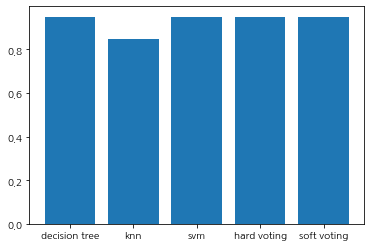

In [23]:
import matplotlib.pyplot as plt
%matplotlib inline

x = np.arange(5)
plt.bar(x, height= [accuracy_score(y_test, dtree_predicted),
                    accuracy_score(y_test, knn_predicted),
                    accuracy_score(y_test, svm_predicted),
                    accuracy_score(y_test, hard_voting_predicted),
                    accuracy_score(y_test, soft_voting_predicted)])
plt.xticks(x, ['decision tree','knn','svm','hard voting','soft voting']);

## 원하는 장소 3개를 넣어서, 맞추어 보자!!

In [24]:
test_df1 = test_df.iloc[3:6]
test_df1

,longitude,latitude,label
3,126.815719,37.575817,Gangseo
4,126.891620,37.577039,Gangseo
5,127.030720,37.508838,Gangnam


In [25]:
X_test1 = test_df1[['longitude', 'latitude']]
y_test1 = test_df1[['label']]['label']

In [26]:
X_test1.shape, y_test1.shape

((3, 2), (3,))

In [27]:
hard_voting_predicted = voting_clf1.predict(X_test1)
accuracy_score(y_test1, hard_voting_predicted)

1.0

In [28]:
soft_voting_predicted = voting_clf2.predict(X_test1)
accuracy_score(y_test1, soft_voting_predicted)

1.0